## Compare SL images  GEMS Rubin

- author : Sylvie Dagoret-Campagne
- creation date : 2025-05-24

In [1]:
import astroquery
print(astroquery.__version__)

0.4.11.dev10140


https://stackoverflow.com/questions/59699193/how-to-obtain-2d-cutout-of-an-image-from-a-skycoord-position

In [2]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
import os

In [3]:
# For Angle conversion
from astropy.coordinates import Angle
import astropy.units as u
from astropy.coordinates import SkyCoord
import pandas as pd
import numpy as np
from astropy.nddata import Cutout2D

In [4]:
from astropy.visualization import ZScaleInterval, AsinhStretch, ImageNormalize

In [5]:
from IPython.display import Image, display

## Configuration

### Target in ECDFS

- path to article : https://arxiv.org/pdf/1104.0931
- visual selection of the tiles : https://archive.stsci.edu/prepds/gems/browser.html
- path file download : https://archive.stsci.edu/pub/hlsp/gems/v_mk1/

In [6]:
fig_table1 = "input_figs/table1_gemcandidates.png"
fig_table2 = "input_figs/table2_gemcandidates.png"

In [7]:
Image(url= fig_table1,width=800)

In [8]:
Image(url= fig_table2,width=500)

In [9]:
#15422 44 03:32:38.21 –27:56:53.2 
ra1 = "03:32:38.21 hours"
dec1 = "-27:56:53.2 degrees"
tile1 = 44

#34244 94 03:32:06.45 –27:47:28.6 
ra2 = "03:32:06.45 hours"
dec2 = "-27:47:28.6 degrees"
tile2 = 94
# Je ne trouve pas cette tile ==> FindTileForCutoutGEM
tile2 = 32

#40173 35 03:33:19.45 –27:44:50.0 
ra3 = "03:33:19.45 hours"
dec3 = "-27:44:50.0 degrees"
tile3 = 35

#43242 45 03:31:55.35 –27:43:23.5 
ra4 = "03:31:55.35 hours"
dec4 = "-27:43:23.5 degrees"
tile4 = 45

#46446 47 03:31:35.94 –27:41:48.2 
ra5 = "03:31:35.94 hours"
dec5 = "-27:41:48.2 degrees"
tile5 = 47

#12589 03:31:24.89 −27:58:07.0
ra6 = "03:31:24.89 hours"
dec6 = "-27:58:07.0 degrees"
tile6 = 17

#43797 03:31:31.74 −27:43:00.8 
ra7 = "03:31:31.74 hours"
dec7 = "-27:43:00.8 degrees"
tile7 = 47

#28294 03:31:50.54 −27:50:28.4 
ra8 = "03:31:50.54 hours"
dec8 = "-27:50:28.4 degrees"
tile8 = 33

#36857 03:31:53.24 −27:46:18.9
ra9 = "03:31:53.24 hours"
dec9 = "-27:46:18.9 degrees"
tile9 = 38

#36714 03:32:59.78 −27:46:26.4 
ra10 = "03:32:59.78 hours"
dec10 = "-27:46:26.4 degrees"
tile10 = 37


In [10]:
lsstcomcam_targets = {}
# high rank
lsstcomcam_targets["ECDFS_G15422"] = {"field_name": "GEMS-15422", "ra": 53.159208333333325, "dec": -27.94811111111111,"tile":tile1}
lsstcomcam_targets["ECDFS_G34244"] = {"field_name": "GEMS-34244", "ra": 53.02687499999999 , "dec": -27.79127777777778,"tile":tile2}
lsstcomcam_targets["ECDFS_G40173"] = {"field_name": "GEMS-40173", "ra": 53.33104166666666 , "dec": -27.747222222222224,"tile":tile3}
lsstcomcam_targets["ECDFS_G43242"] = {"field_name": "GEMS-43242", "ra": 52.980624999999996 , "dec": -27.72319444444444,"tile":tile4}
lsstcomcam_targets["ECDFS_G46446"] = {"field_name": "GEMS-46446", "ra": 52.89975 , "dec": -27.696722222222224,"tile":tile5}

# low rank
lsstcomcam_targets["ECDFS_G12589"] = {"field_name": "GEMS-12589", "ra": 52.85370833333333, "dec": -27.96861111111111,"tile":tile6}
lsstcomcam_targets["ECDFS_G43797"] = {"field_name": "GEMS-43797", "ra": 52.88224999999999, "dec": -27.71688888888889,"tile":tile7}

lsstcomcam_targets["ECDFS_G28294"] = {"field_name": "GEMS-28294", "ra": 52.960583333333325 , "dec": -27.84122222222222,"tile":tile8}
lsstcomcam_targets["ECDFS_G6857"] = {"field_name": "GEMS-6857", "ra": 52.97183333333333 , "dec": -27.771916666666666,"tile":tile9}
lsstcomcam_targets["ECDFS_G36714"] = {"field_name": "GEMS-36714", "ra": 53.249083333333324, "dec": -27.773999999999997,"tile":tile10}


In [11]:
df = pd.DataFrame(lsstcomcam_targets).T

In [12]:
# candidates
#key = "ECDFS_G15422"
key = "ECDFS_G34244"
#key = "ECDFS_G40173"
#key= "ECDFS_G43242"
#key= "ECDFS_G46446"

# unknown
#key = "ECDFS_G12589"
#key = "ECDFS_G43797"
#key = "ECDFS_G28294"
#key = "ECDFS_G6857"
#key = "ECDFS_G36714"

the_target = lsstcomcam_targets[key]
target_ra = the_target["ra"]
target_dec = the_target["dec"]
target_name = the_target["field_name"]
tile_num = the_target["tile"]
coord = SkyCoord(ra=target_ra, dec=target_dec, unit=(u.deg, u.deg))

target_title = (
    the_target["field_name"] + f" (ra,dec) = ({target_ra:.2f},{target_dec:.2f}) "
)

### Access to remote files

- visual selection of the tiles : https://archive.stsci.edu/prepds/gems/browser.html
- path file download : https://archive.stsci.edu/pub/hlsp/gems/v_mk1/

### Config

- http://archive.stsci.edu/pub/hlsp/gems/v_mk1/h_gems_v35_mk1.fits
- url = f"http://archive.stsci.edu/pub/hlsp/gems/z_mk1/h_gems_z{tile_num}_mk1.fits"

In [13]:
toppath_gemscutout = "."
toppath_rubincutout = "../2025-05-24-SL-ECDFS-Fit/data"

In [14]:
ls ../2025-05-24-SL-ECDFS-Fit/data/G15422/

cutout_psf_ECDFS_G15422_g.fits  cutout_var_ECDFS_G15422_g.fits  cutout_wcs_ECDFS_G15422_g.fits
cutout_psf_ECDFS_G15422_i.fits  cutout_var_ECDFS_G15422_i.fits  cutout_wcs_ECDFS_G15422_i.fits
cutout_psf_ECDFS_G15422_r.fits  cutout_var_ECDFS_G15422_r.fits  cutout_wcs_ECDFS_G15422_r.fits
cutout_psf_ECDFS_G15422_u.fits  cutout_var_ECDFS_G15422_u.fits  cutout_wcs_ECDFS_G15422_u.fits
cutout_psf_ECDFS_G15422_y.fits  cutout_var_ECDFS_G15422_y.fits  cutout_wcs_ECDFS_G15422_y.fits
cutout_psf_ECDFS_G15422_z.fits  cutout_var_ECDFS_G15422_z.fits  cutout_wcs_ECDFS_G15422_z.fits


In [15]:
# select your bands
SELECT_VBAND = "v"
SELECT_ZBAND = "z"
SELECT_BAND = SELECT_VBAND

In [16]:
all_gems_id_numbers1 = [15422,34244,40173,43242,46446]
all_gems_id_numbers2 = [12589,43797,28294,6857,36714]

In [17]:
sl_number = all_gems_id_numbers1[0]
subpath1 = f"G{sl_number}"
path1 = os.path.join(toppath_rubincutout,subpath1)
path2 = toppath_gemscutout

band1 = "g"
band2 = "z"

In [18]:
ls $path1

cutout_psf_ECDFS_G15422_g.fits  cutout_var_ECDFS_G15422_g.fits  cutout_wcs_ECDFS_G15422_g.fits
cutout_psf_ECDFS_G15422_i.fits  cutout_var_ECDFS_G15422_i.fits  cutout_wcs_ECDFS_G15422_i.fits
cutout_psf_ECDFS_G15422_r.fits  cutout_var_ECDFS_G15422_r.fits  cutout_wcs_ECDFS_G15422_r.fits
cutout_psf_ECDFS_G15422_u.fits  cutout_var_ECDFS_G15422_u.fits  cutout_wcs_ECDFS_G15422_u.fits
cutout_psf_ECDFS_G15422_y.fits  cutout_var_ECDFS_G15422_y.fits  cutout_wcs_ECDFS_G15422_y.fits
cutout_psf_ECDFS_G15422_z.fits  cutout_var_ECDFS_G15422_z.fits  cutout_wcs_ECDFS_G15422_z.fits


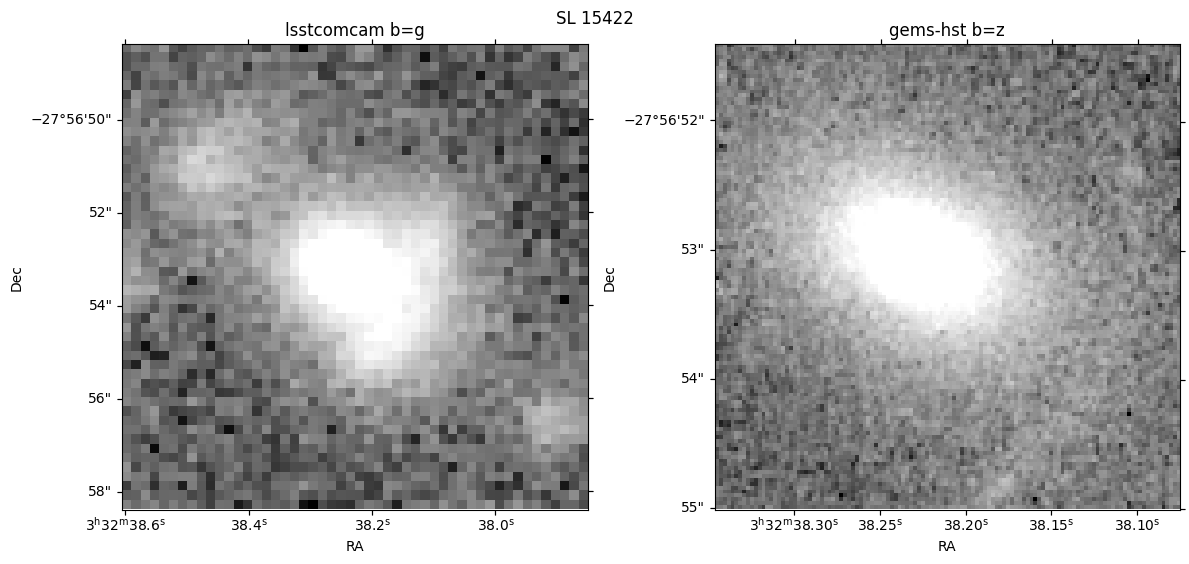

In [27]:
title1 = f"lsstcomcam b={band1}"
title2 = f"gems-hst b={band2}"
suptitle = f"SL {sl_number}"

# --- Remplace par tes fichiers FITS ---
file1 = f"cutout_wcs_ECDFS_{subpath1}_{band1}.fits"
file2 = f"cutout_gems_ECDFS_{subpath1}_b{band2}.fits"

fullfilename1 = os.path.join(path1 ,file1)
fullfilename2 = os.path.join(path2 ,file2)

# --- Ouvrir les fichiers et leurs WCS ---
hdu1 = fits.open(fullfilename1)[1]
wcs1 = WCS(hdu1.header)
data1 = hdu1.data

hdu2 = fits.open(fullfilename2)[0]
wcs2 = WCS(hdu2.header)
data2 = hdu2.data


zscale = ZScaleInterval()
vmin1, vmax1 = zscale.get_limits(data1)
vmin2, vmax2 = zscale.get_limits(data2)

# --- Normalisation avec transformation asinh ---
norm1 = ImageNormalize(vmin=vmin1, vmax=vmax1, stretch=AsinhStretch())
norm2 = ImageNormalize(vmin=vmin2, vmax=vmax2, stretch=AsinhStretch())


# --- Préparer la figure avec 2 sous-graphes alignés horizontalement ---
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': wcs1})
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1, projection=wcs1)

# Si les deux images ont des WCS différents, on peut créer une figure personnalisée :
ax2 = fig.add_subplot(1, 2, 2, projection=wcs2)

# --- Afficher les images ---
im1 = ax1.imshow(data1, origin='lower', cmap='gray', norm=norm1)
im2 = ax2.imshow(data2, origin='lower', cmap='gray', norm=norm2)

# --- Ajouter des axes WCS ---
ax1.set_xlabel('RA')
ax1.set_ylabel('Dec')
ax1.set_title(title1)
#ax1.grid(color="r")

ax2.set_xlabel('RA')
ax2.set_ylabel('Dec')
ax2.set_title(title2)
#ax2.grid(color="r")

# --- Affichage final ---
plt.tight_layout()
plt.suptitle(suptitle)
plt.show()